### Grupperte data

Vi skal bestille klovnebukser til medlemmene i fanklubben til det norske curlinglandslaget. Medlemmene har oppgitt livvidde, og opptellingen viste at vi trenger:

15 i small, 142 i medium, 79 i large, 171 i XL, 114 i XXL og 37 i 3XL. Under setter vi dette opp i en OrderedDict. Denne gjør at vi beholder størrelsene i riktig rekkefølge i kommende tabeller. En vanlig dict / hashmap vil ikke beholdt rekkefølgen.

In [1]:
from collections import OrderedDict

data = OrderedDict()
data['S'] = {
    'Fra': 76,
    'Til': 82,
    'Antall': 15
}
data['M'] = {
    'Fra': 82,
    'Til': 90,
    'Antall': 142
}
data['L'] = {
    'Fra': 90,
    'Til': 98,
    'Antall': 79
}
data['XL'] = {
    'Fra': 98,
    'Til': 106,
    'Antall': 171
}
data['XXL'] = {
    'Fra': 106,
    'Til': 110,
    'Antall': 114
}
data['3XL'] = {
    'Fra': 110,
    'Til': 116,
    'Antall': 37
}

data

OrderedDict([('S', {'Antall': 15, 'Fra': 76, 'Til': 82}),
             ('M', {'Antall': 142, 'Fra': 82, 'Til': 90}),
             ('L', {'Antall': 79, 'Fra': 90, 'Til': 98}),
             ('XL', {'Antall': 171, 'Fra': 98, 'Til': 106}),
             ('XXL', {'Antall': 114, 'Fra': 106, 'Til': 110}),
             ('3XL', {'Antall': 37, 'Fra': 110, 'Til': 116})])

Vi har satt opp hver gruppe med mål i cm. Det vil si at størrelse S gjelder for livvidder fra 76 til 82 cm. Nå kan vi gjøre dette om til en DataFrame, slik at vi kan få laget tabeller og grafer av dette.

In [2]:
from pandas import DataFrame

df = DataFrame.from_dict(data) # Lager en DataFrame fra vår data-variabel, som er av type OrderedDict / dict

# Henter ut kolonnen "Antall", og gjør den om til en DataFrame. Uten "to_frame" ville vi ikke fått en like fin tabell.
frekvens = df.loc['Antall'].to_frame()

frekvens

,Antall
S,15
M,142
L,79
XL,171
XXL,114
3XL,37


Nå kan vi videre lage et frekvensdiagram. Vi er fremdeles bare interessert i "Antall"-kolonnen, så vi gjenbruker "frekvens"-variabelen fra tidligere.

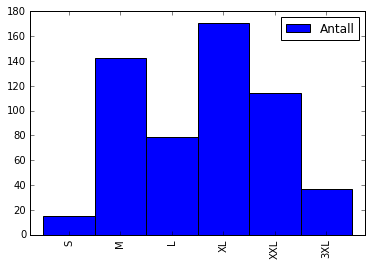

In [3]:
# Setter opp plotteverktøyet slik at vi får se figuren direkte i notebooken
%matplotlib inline
import matplotlib.pyplot as plt

# Plotter frekvens som en "bar chart", med full bredde (kan være 0-1), slik at stolpene treffer hverandre
frekvens.plot.bar(width=1)
plt.show()

Med det samme kan vi også lage en kumulativ frekvenstabell, og plotte denne.

In [4]:
frekvens_kumulativ = frekvens.cumsum()

frekvens_kumulativ

,Antall
S,15
M,157
L,236
XL,407
XXL,521
3XL,558


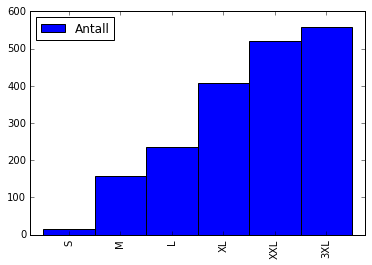

In [5]:
frekvens_kumulativ.plot.bar(width=1)
plt.show()

### Intervallgrenser, bredde og gjennomsnitt

Nå skal vi utvide DataFramen vår. Vi har allerede fra- og til-grenser, men vi kan enkelt også regne ut bredden for hvert av disse intervallene. Med pandas kan vi bruke "loc" på DataFrame-objekter for å hente ut en rad. Vi definerer hvilken rad det er snakk om som en tekstverdi mellom [ og ].

Det vi gjør her er at vi lager en ny rad, med navn "Bredde", og setter denne til å være lik "Til"-raden minus "Fra"-raden. Da tar Pandas alle verdier i "Til", og trekker fra samme kolonne i "Fra", og lagrer dette som en ny rad.

Tilsvarende gjør vi får gjennomsnitt. Da tar vi til- og fra-grenser, legger dem sammen, og deler på to. Det gir verdien midt i intervallet.

In [6]:
df.loc['Bredde']  = df.loc['Til']-df.loc['Fra']
df.loc['Gjennomsnitt'] = (df.loc['Til']+df.loc['Fra'])/2

df

,S,M,L,XL,XXL,3XL
Antall,15,142,79,171,114,37
Fra,76,82,90,98,106,110
Til,82,90,98,106,110,116
Bredde,6,8,8,8,4,6
Gjennomsnitt,79,86,94,102,108,113


In [7]:
from pandas import Series

# Forkortelser, så vi slipper å gjenta df.loc[...]
gjsnitt = df.loc['Gjennomsnitt']
antall = df.loc['Antall']

# TODO...

arr = []
for i in range(len(antall)):
    repeat_times = int(antall[i])
    arr.extend([gjsnitt[i]] * repeat_times)

s = Series(arr)

s.median(), s.quantile(0.25), s.quantile(0.75), s.mean(), s.var()

NameError: name 'Series' is not defined